# Edge-Based Segmentation

**Background:**  
Edge-based methods aim to detect object boundaries by identifying intensity discontinuities in images. These methods are commonly used in applications such as road detection and object tracking. The general approach involves detecting edges, refining them, and then extracting meaningful geometric features.

**Tasks:**
- **(a)** Detect edges using the **Canny operator**, and choose suitable low and high hysteresis thresholds.
- **(b)** Perform **non-maxima suppression** and **thresholding** to produce a clean binary edge map.
- **(c)** Apply the **Hough transform** to extract straight lines from the edge map and **overlay** the detected lines on the original image.
- **(d)** **Explain** how **noise** and the **choice of thresholds** affect the completeness of the detected contours.


___

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the image in grayscale
img = cv2.imread("/mnt/e/Term 4/HW/HW8/images/q3/solar.png", cv2.IMREAD_GRAYSCALE)

In [227]:
blurred = cv2.GaussianBlur(img, (7, 7), 1.2)

(-0.5, 699.5, 499.5, -0.5)

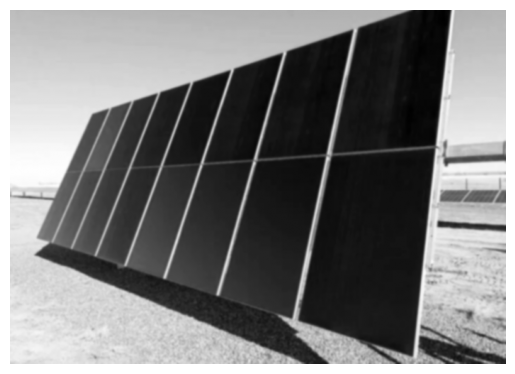

In [253]:
plt.imshow(blurred, cmap='gray')
plt.axis('off')

In [229]:
med = np.median(blurred)
low_thresh_med = 0.33 * med
low_thresh_med

29.040000000000003

In [230]:
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

gradiend_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradiend_magnitude = np.uint8(gradiend_magnitude)

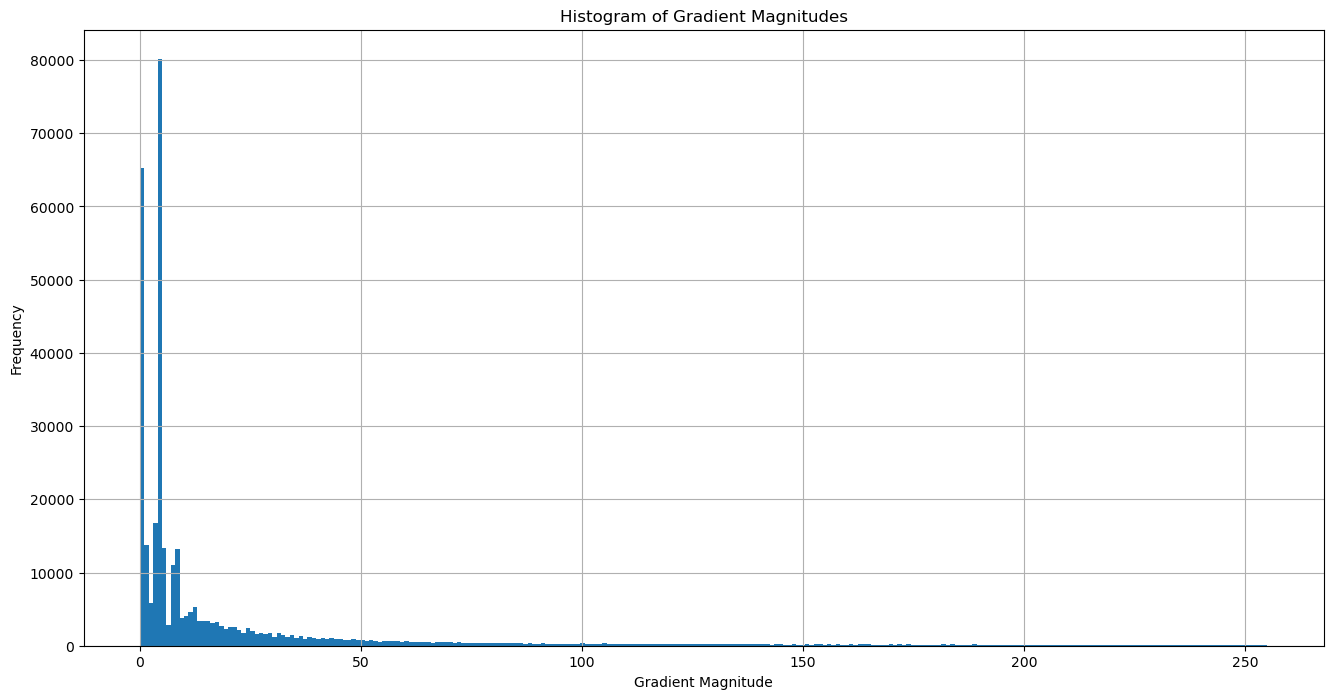

In [231]:
plt.figure(figsize=(16, 8))
plt.hist(gradiend_magnitude.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of Gradient Magnitudes")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [232]:
low_thresh = 45
high_thresh = 135

In [233]:
edges = cv2.Canny(blurred, low_thresh, high_thresh)

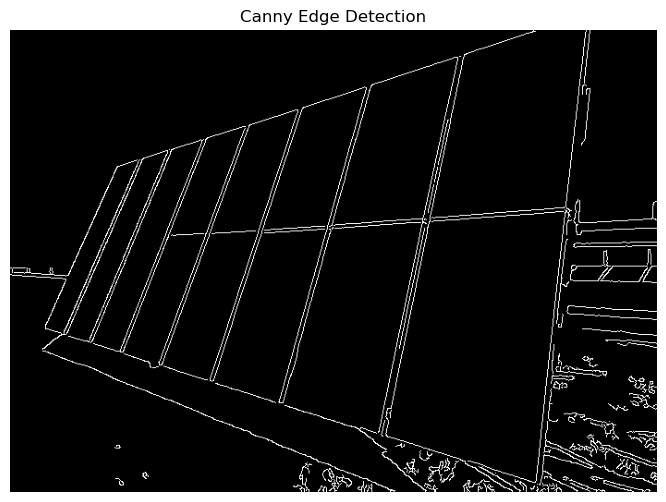

In [234]:
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

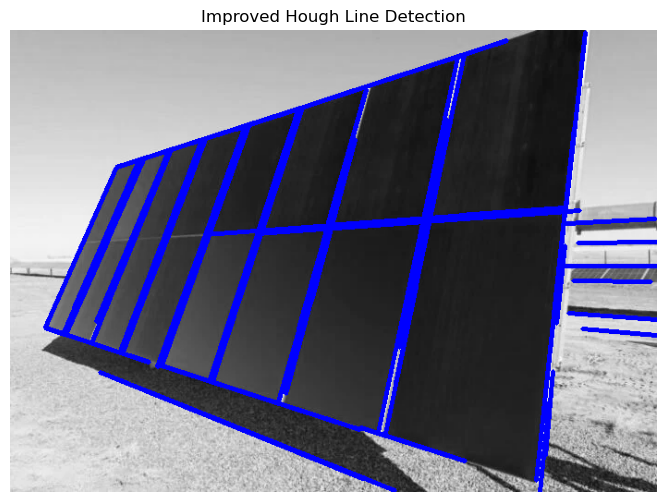

In [252]:
# Probabilistic Hough Transform
lines = cv2.HoughLinesP(
    edges,
    rho=0.9,
    theta=np.pi / 180,
    threshold=40,
    minLineLength=80,
    maxLineGap=10
)

# Convert to color to draw lines
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Draw lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 3)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(output)
plt.title("Improved Hough Line Detection")
plt.axis('off')
plt.show()